### selenium 라이브러리 
1. 웹 어플리케이션을 테스트하기 위한 라이브러리 
2. python에서 웹브라우져를 제어하기 위한 라이브러리 
3. 크롬의 구버전은 웹드라이버라는 별도의 소프트웨어가 필요

In [ ]:
!pip install selenium

In [ ]:
# 라이브러리 로드 
from selenium import webdriver

In [ ]:
driver = webdriver.Chrome()

In [ ]:
# 웹 브라우져에 주소값을 입력해서 요청
driver.get("https://www.naver.com")

In [ ]:
# HTML TAG들에 접근하기위한 기능 로드 
# By는 TAG들의 속성 값들에 접근하기 위한 기능
from selenium.webdriver.common.by import By
# Keys는 키보드 입력방식에 접근하기 위한 기능
from selenium.webdriver.common.keys import Keys

In [ ]:
# 네이버에 있는 검색창(TAG, element)을 선택
# id가 query인 element를 선택
element = driver.find_element(By.ID, 'query')

In [ ]:
# 검색어창에 특정한 문자열을 입력
element.send_keys('노원맛집')

In [ ]:
# 엔터키를 입력
element.send_keys(Keys.ENTER)

In [ ]:
# class가 lnk_head인 element중 첫번째 element
element2 = driver.find_element(By.CLASS_NAME, 'lnk_head')

In [ ]:
element2.click()

In [ ]:
# 웹브라우져의 탭의 정보를 모두 확인
all_window = driver.window_handles

In [ ]:
# 자식창으로 이동
driver.switch_to.window(all_window[1])

In [ ]:
element3 = driver.find_element(By.CLASS_NAME, 'quick03')

In [ ]:
element3.click()

In [ ]:
# 웹브라우져의 html를 로드 
driver.page_source

In [ ]:
from bs4 import BeautifulSoup as bs

In [ ]:
# driver에 있는 page_source를 BeautifulSoup에서 사용하기 위해 데이터를 변환
soup = bs(driver.page_source, 'html.parser')

In [ ]:
soup

In [ ]:
privacy_data = soup.find('div', 
          attrs={
              'class' : 'privacy_wrap'
          }).get_text()

In [ ]:
privacy_data = privacy_data.replace('\n', '')

In [ ]:
a = '   !test!   '
a.strip().strip('!')

In [ ]:
!pip install konlpy

In [ ]:
# 라이브러리 로드 
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [ ]:
# Okt() class 생성
okt = Okt()

In [ ]:
kkma = Kkma()

In [37]:
nouns = okt.nouns(privacy_data)

In [ ]:
kkma.nouns(privacy_data)

In [ ]:
# 리스트에서 글자수가 1인 데이터를 제거 
words = []

for i in nouns:
    # 단어의 길이가 1보다 큰 경우
    if len(i) > 1:
        # words 리스트에 i을 추가 
        words.append(i)

words

In [ ]:
words2 = [i for i in nouns if len(i) > 1]
words2

In [42]:
from collections import Counter

In [44]:
cnt = Counter(words)

In [47]:
len(cnt)

493

In [45]:
# 워드클라우드 라이브러리 
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [48]:
# wordcloud로 시각화
wc = WordCloud(
    font_path= 'malgun', 
    width = 800, 
    height = 800, 
    scale = 2.0, 
    max_font_size=300, 
    max_words=200
)

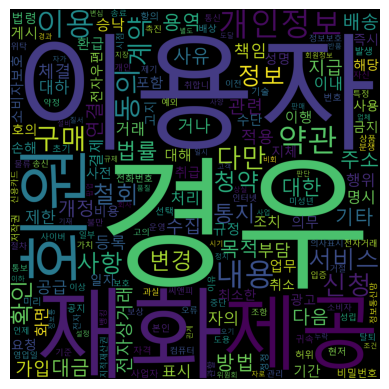

In [51]:
gen =  wc.generate_from_frequencies(cnt)
plt.figure()
plt.axis('off')
plt.imshow(gen)


In [ ]:
# 특정한 이미지 모양대로 워드클라우드를 생성
img = Image.open('./pngwing.png')
# 이미지 파일을 행렬식으로 변환
img_array = np.array(img)
img_array

In [53]:
wc2 = WordCloud(
    font_path='malgun', 
    width = 800, 
    height= 800, 
    scale = 2.0, 
    max_font_size=350, 
    max_words=200, 
    mask = img_array
)

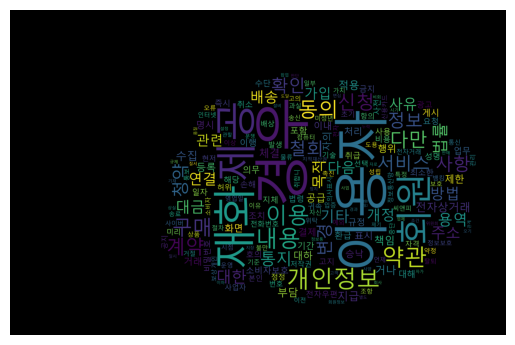

In [54]:
gen2 = wc2.generate_from_frequencies(cnt)
plt.axis('off')
plt.imshow(gen2)


In [4]:
import sys
sys.path

['d:\\python\\EG-python\\pandas',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']